# Read traveltime field and adjoint field.

In [10]:
from pytomoatt.data import ATTData
import numpy as np

In [11]:
# file to be read
input_file = 'OUTPUT_FILES/OUTPUT_FILES_fields/out_data_sim_group_1.h5'
# input parameters file
par_file = '3_input_params/input_params_inv.yaml'
# grid file
grid_file = 'OUTPUT_FILES/OUTPUT_FILES_fields/out_data_grid.h5'

# read traveltime field
group   = "src_s1"          # "src_$src_name"
dataset = "T_res_inv_0000"  # "T_res_inv_$iter"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
time_field = data.to_xarray()

# we can access 3D time field data by
time_field_data = time_field[dataset]
print("3D time field array shape: ", time_field_data.shape)

# or we can interp it to a 2D slice at depth
depth = 0.0
tmp = time_field.interp_dep(depth, field=dataset)
lon   = tmp[:,0]
lat   = tmp[:,1]
time  = tmp[:,2]

# Similarly, we can do the same for adjoint field
dataset = "adjoint_field_inv_0000"  # "adjoint_field_inv_$iter"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
adjoint_field = data.to_xarray()

# we can access 3D adjoint field data by
adjoint_field_data = adjoint_field[dataset]

# or we can interp it to a 2D slice at depth
depth = 0.0
adjoint = adjoint_field.interp_dep(depth, field=dataset)[:,2]

3D time field array shape:  (7, 201, 201)


# Pygmt plot time field and adjoint field

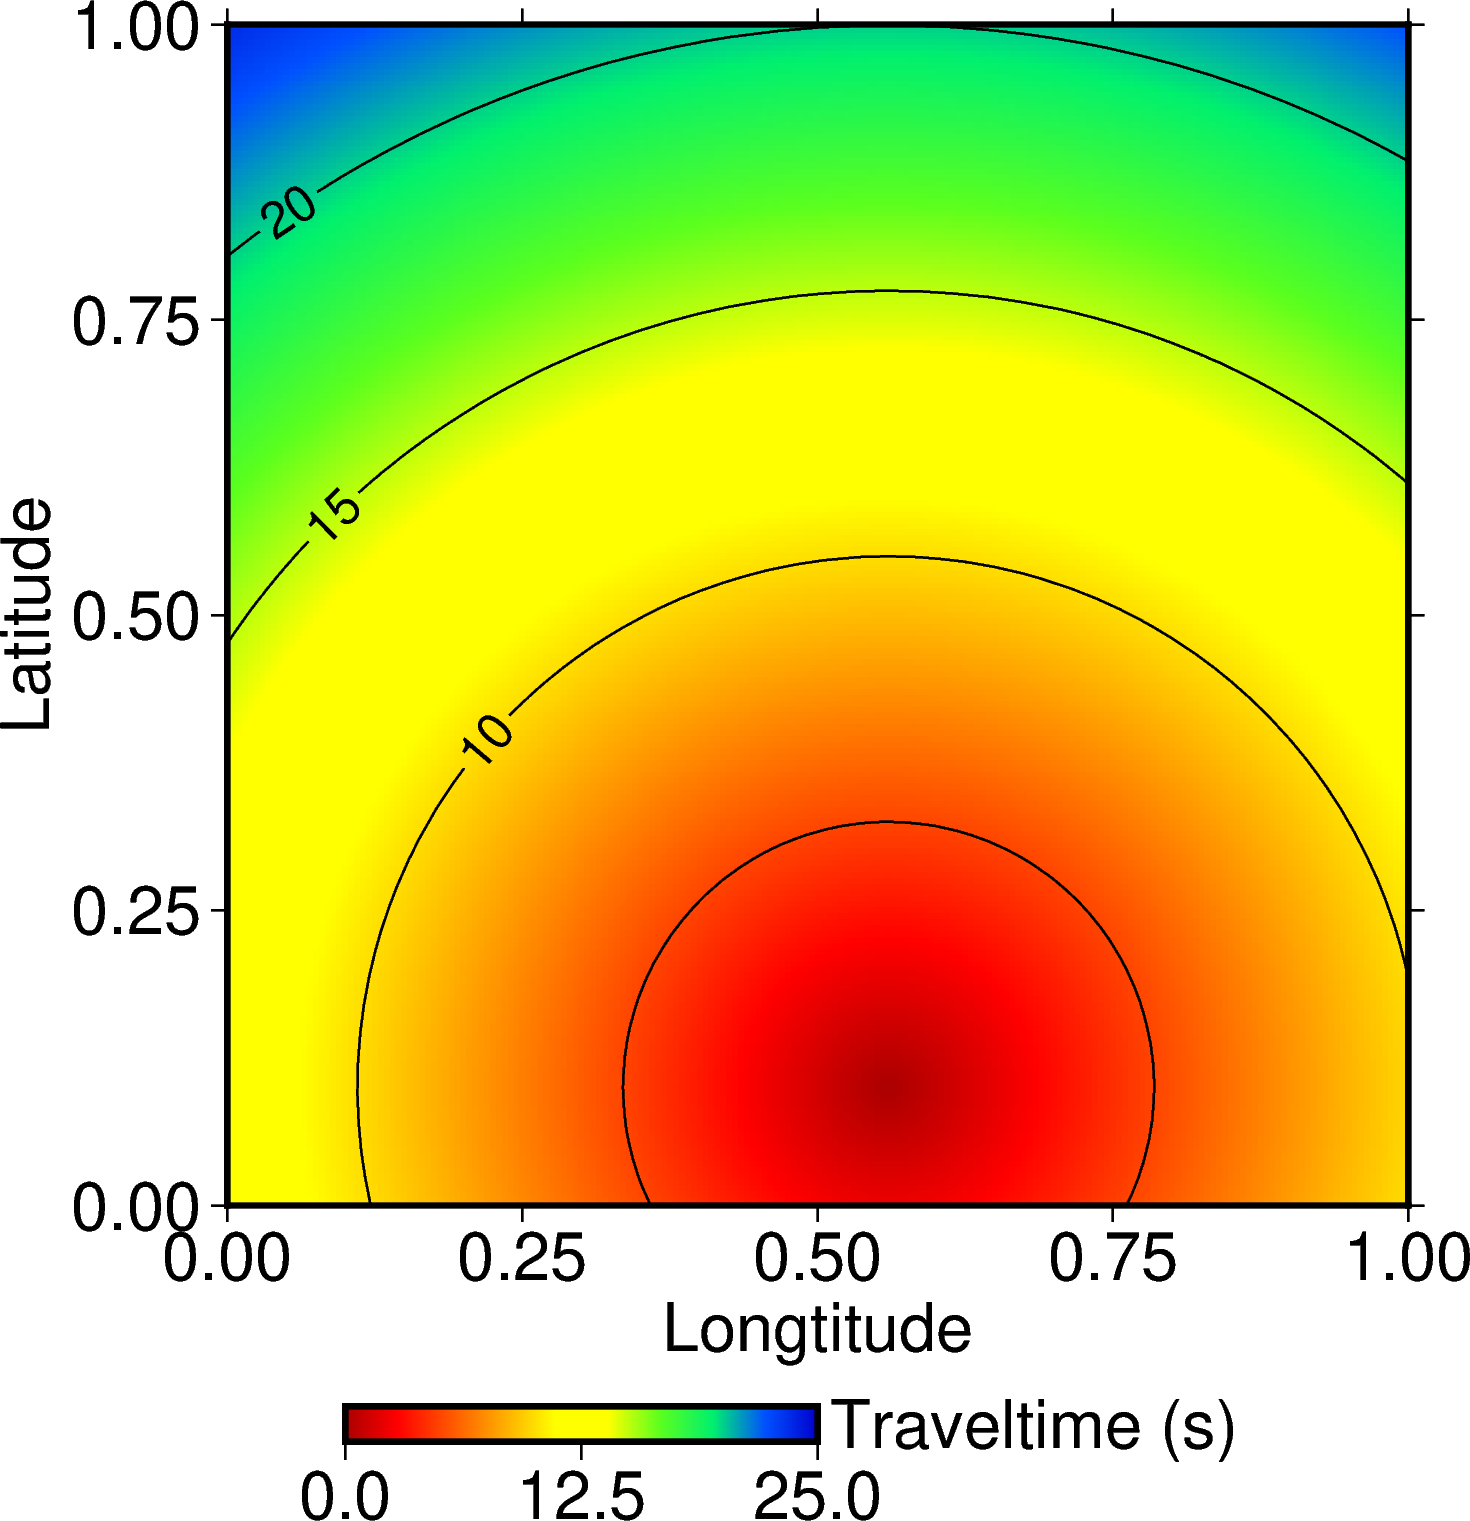

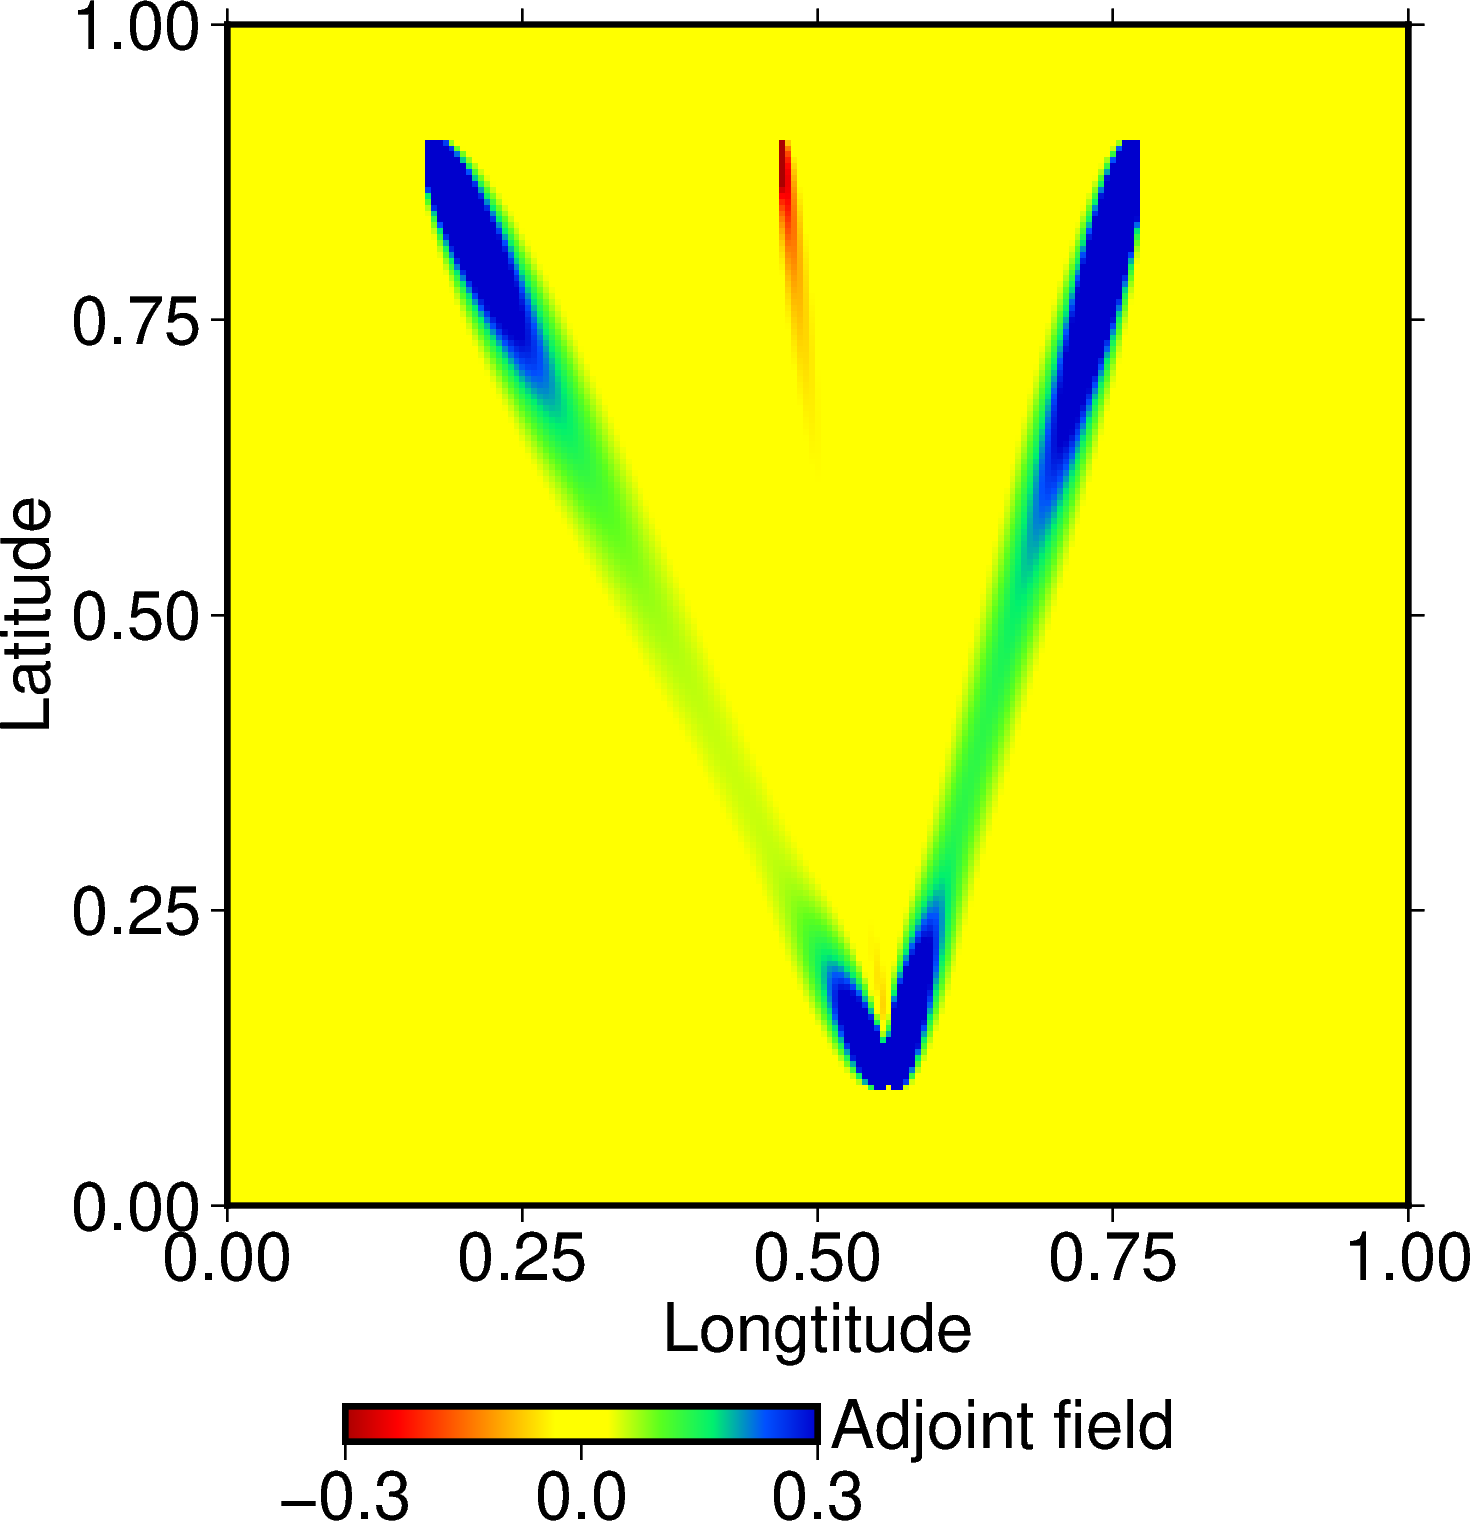

In [12]:
import sys
sys.path.append('../utils')
from functions_for_plot import plot_map

dx = 0.01; dy = 0.01

fname = 'img/3a_traveltime.png'
fig = plot_map(lon,lat,time,dx,dy,
            fname = fname, 
            contour = True,
            levels = 5,
            x_label = "Longtitude",
            y_label = "Latitude",
            colorbar = "Traveltime (s)",
            cpt_range = [0,25],)

fname = 'img/3b_adjoint.png'
fig = plot_map(lon,lat,adjoint,dx,dy,
            fname = fname, 
            x_label = "Longtitude",
            y_label = "Latitude",
            colorbar = "Adjoint field",
            cpt_range = [-0.3,0.3],)